<div style="
    background: linear-gradient(135deg, #0d0d0d, #1f1f1f, #2e2e2e);
    border: 2px solid #ff4d4d;
    border-radius: 16px;
    padding: 25px;
    box-shadow: 0 0 25px rgba(255, 77, 77, 0.4);
    font-family: 'Segoe UI', sans-serif;
    color: #f2f2f2;
    line-height: 1.7;
">

<h1 style="
    text-align: center;
    color: #ff4d4d;
    font-size: 32px;
    text-shadow: 0 0 10px #ff1a1a;
">🌐 Predicting the End of Social Media — AI Global Forecasting Project</h1>

<p style="text-align:center; font-size:14px; color:#ff9999; margin-top:-5px;">
Created by <b>Sara Zahran</b> | Data & AI Research Project 2025
</p>

<p style="font-size:17px; text-align:justify; color:#e6e6e6;">
This project explores the <b style="color:#ff6666;">potential decline and transformation of social media platforms</b> worldwide 
using advanced AI and data analytics. By combining <b style="color:#ff9999;">global engagement datasets</b> with 
<b style="color:#ffcccb;">internet usage statistics (2000–2023)</b>, the model predicts how online interaction patterns 
are expected to evolve over the next decade.
</p>

<p style="font-size:16px; text-align:justify; color:#ffb3b3;">
<b>Reasons & Motivation:</b> Understanding how social media trends evolve helps businesses, policymakers, and society 
anticipate changes in digital interaction, adapt strategies, and prepare for possible societal impacts of declining online engagement.
</p>

<h3 style="color:#ff4d4d;">🔍 Project Overview:</h3>
<ul style="font-size:16px; margin-left:25px;">
    <li>📊 Data integration from multiple sources including engagement and internet usage.</li>
    <li>🧠 Advanced ML models (Prophet, XGBoost, RandomForest, Ensemble Learning) for forecasting trends.</li>
    <li>📉 Detection of global decline signals in social media engagement.</li>
    <li>🌍 Correlation analysis by continent to uncover regional behavior differences.</li>
    <li>🎨 Interactive visualizations and HTML-based analytical insights with predictive interpretations.</li>
</ul>

<h3 style="color:#ff4d4d;">🚀 Highlights:</h3>
<ul style="font-size:16px; margin-left:25px;">
    <li>🔮 Predicts engagement trends for the next 10 years.</li>
    <li>📈 Merges global datasets to uncover socio-digital patterns.</li>
    <li>💡 Offers AI-driven explanations for possible future decline in user engagement.</li>
</ul>

<p style="text-align:center; font-size:15px; margin-top:15px; color:#bfbfbf;">
<b style="color:#ff4d4d;">AI Social Future Predictor</b> — A data-driven look into the <b style="color:#ff6666;">future of digital interaction</b>.
</p>

</div>

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
   Import Libraries

</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [2]:

file_path = "/kaggle/input/social-media-engagement-report/social_media_engagement_data.xlsx"

df = pd.read_excel(file_path)

print(" Data loaded successfully!")
print("Shape:", df.shape)
df.head()

 Data loaded successfully!
Shape: (100000, 18)


,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


In [3]:
df["Post Timestamp"] = pd.to_datetime(df["Post Timestamp"], errors='coerce')

df = df.dropna(subset=["Post Timestamp", "Engagement Rate"])

df["Year"] = df["Post Timestamp"].dt.year
df["Month"] = df["Post Timestamp"].dt.month
df["Day"] = df["Post Timestamp"].dt.day

monthly_engagement = (
    df.groupby(["Platform", "Year", "Month"])["Engagement Rate"]
    .mean()
    .reset_index()
    .sort_values(["Platform", "Year", "Month"])
)

monthly_engagement["Date"] = pd.to_datetime(
    monthly_engagement["Year"].astype(str) + "-" + monthly_engagement["Month"].astype(str) + "-01"
)

print(" Data prepared for time-series forecasting!")
monthly_engagement.head()

 Data prepared for time-series forecasting!


,Platform,Year,Month,Engagement Rate,Date
0,Facebook,2021,3,44.222849,2021-03-01
1,Facebook,2021,4,43.301221,2021-04-01
2,Facebook,2021,5,43.049108,2021-05-01
3,Facebook,2021,6,42.198995,2021-06-01
4,Facebook,2021,7,41.496224,2021-07-01


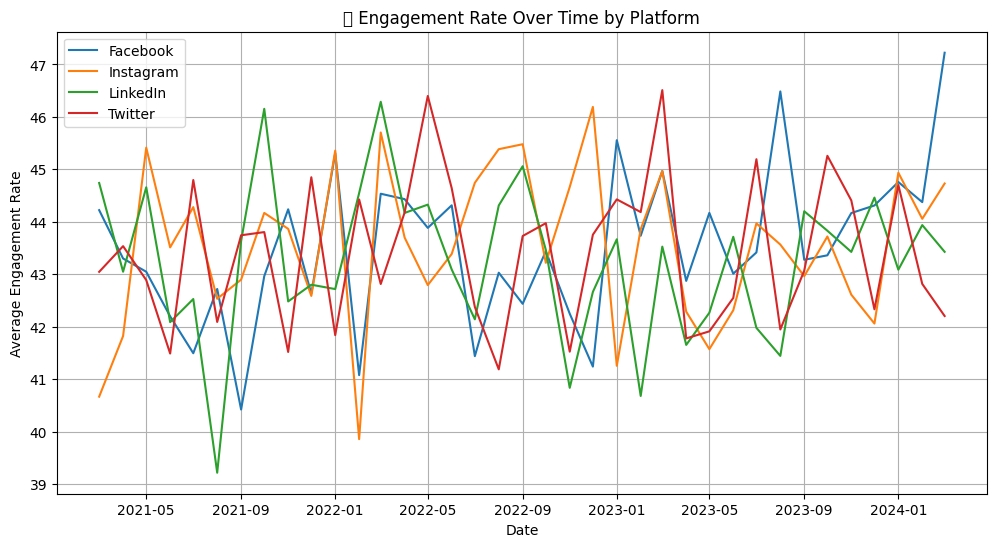

In [4]:

plt.figure(figsize=(12,6))
for platform in monthly_engagement["Platform"].unique():
    subset = monthly_engagement[monthly_engagement["Platform"] == platform]
    plt.plot(subset["Date"], subset["Engagement Rate"], label=platform)

plt.title("📉 Engagement Rate Over Time by Platform")
plt.xlabel("Date")
plt.ylabel("Average Engagement Rate")
plt.legend()
plt.grid(True)
plt.show()

14:21:56 - cmdstanpy - INFO - Chain [1] start processing
14:21:56 - cmdstanpy - INFO - Chain [1] done processing


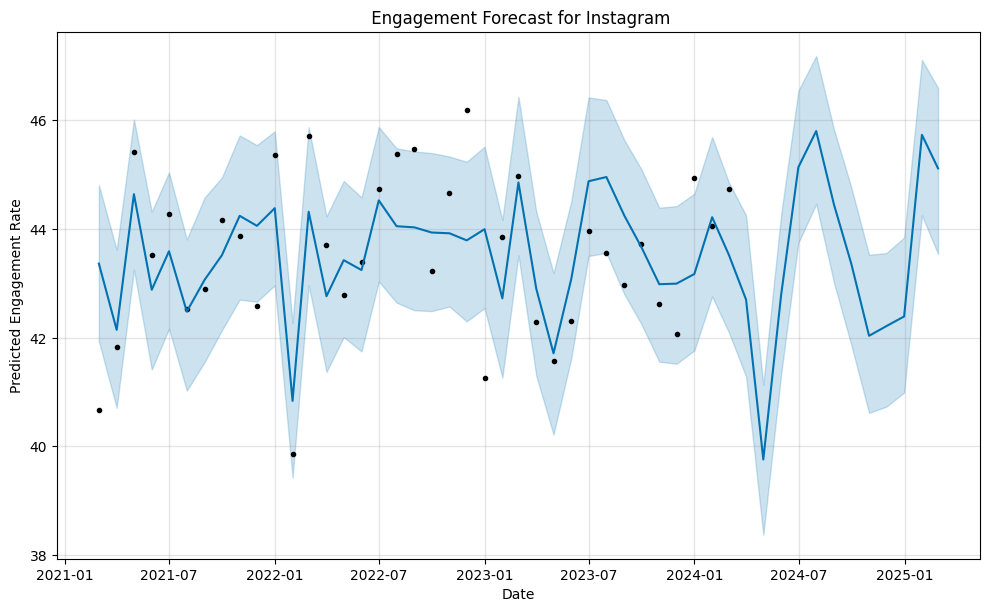

In [5]:
from prophet import Prophet

platform = "Instagram"
data = monthly_engagement[monthly_engagement["Platform"] == platform][["Date", "Engagement Rate"]]
data = data.rename(columns={"Date": "ds", "Engagement Rate": "y"})

model = Prophet(seasonality_mode='additive', yearly_seasonality=True)
model.fit(data)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

model.plot(forecast)
plt.title(f" Engagement Forecast for {platform}")
plt.xlabel("Date")
plt.ylabel("Predicted Engagement Rate")
plt.show()

In [6]:

data_ml = df.copy()

# Convert timestamp
data_ml["Post Timestamp"] = pd.to_datetime(data_ml["Post Timestamp"], errors="coerce")
data_ml["Year"] = data_ml["Post Timestamp"].dt.year
data_ml["Month"] = data_ml["Post Timestamp"].dt.month

features = ["Platform", "Post Type", "Sentiment", "Year", "Month", "Likes", "Comments", "Shares", "Impressions", "Reach"]
target = "Engagement Rate"

# Drop NaNs
data_ml = data_ml.dropna(subset=features + [target])

# Encode categorical columns
le = LabelEncoder()
for col in ["Platform", "Post Type", "Sentiment"]:
    data_ml[col] = le.fit_transform(data_ml[col].astype(str))

# Split data
X = data_ml[features]
y = data_ml[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train advanced model
xgb_advanced = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_advanced.fit(X_train, y_train)

y_pred = xgb_advanced.predict(X_test)

print(" Advanced Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

 Advanced Model Evaluation:
MAE: 0.8797524157049422
R²: 0.9981104691173739


14:21:59 - cmdstanpy - INFO - Chain [1] start processing
14:21:59 - cmdstanpy - INFO - Chain [1] done processing


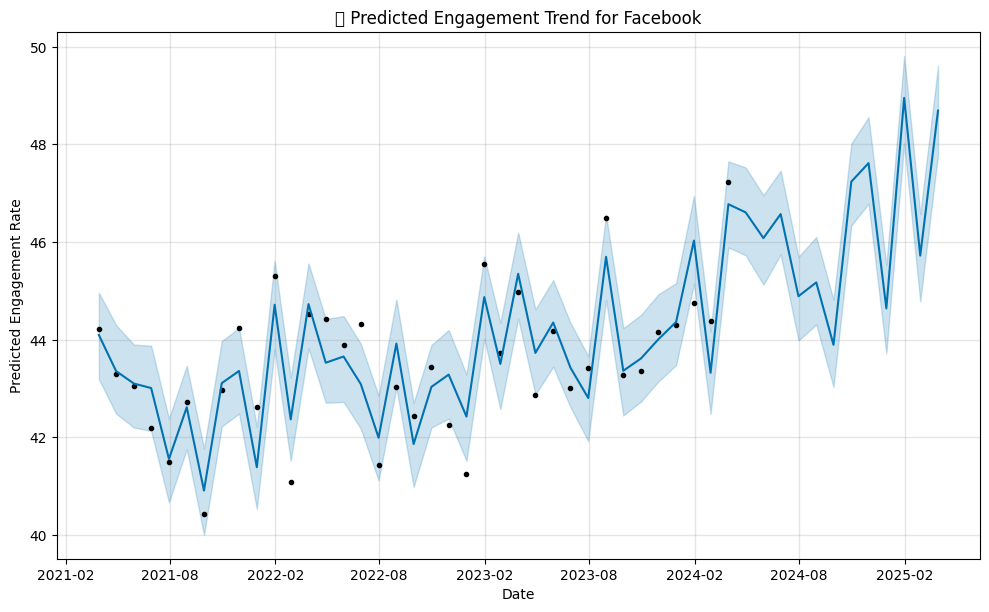

14:21:59 - cmdstanpy - INFO - Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing


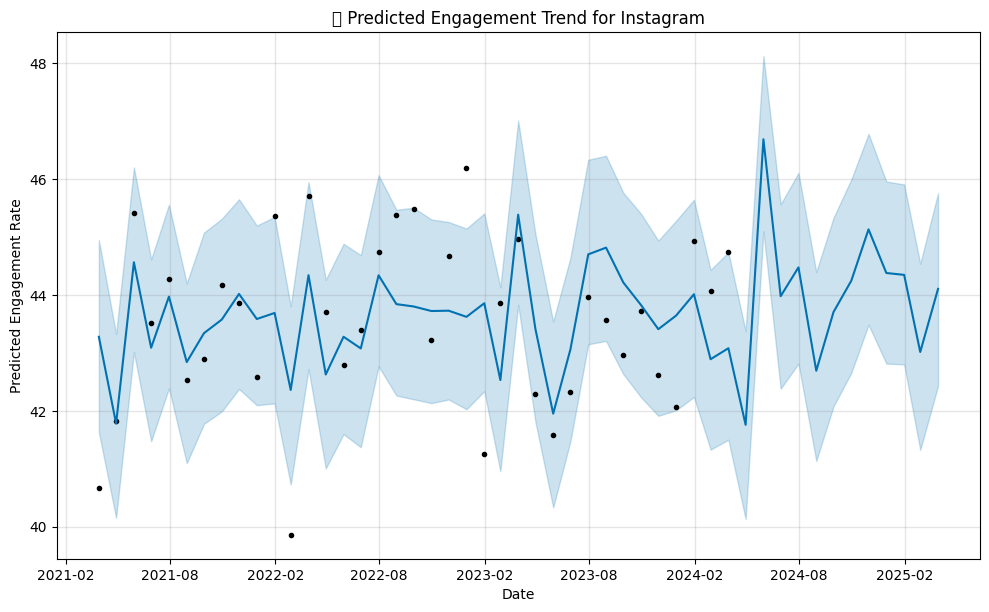

14:22:00 - cmdstanpy - INFO - Chain [1] start processing
14:22:00 - cmdstanpy - INFO - Chain [1] done processing


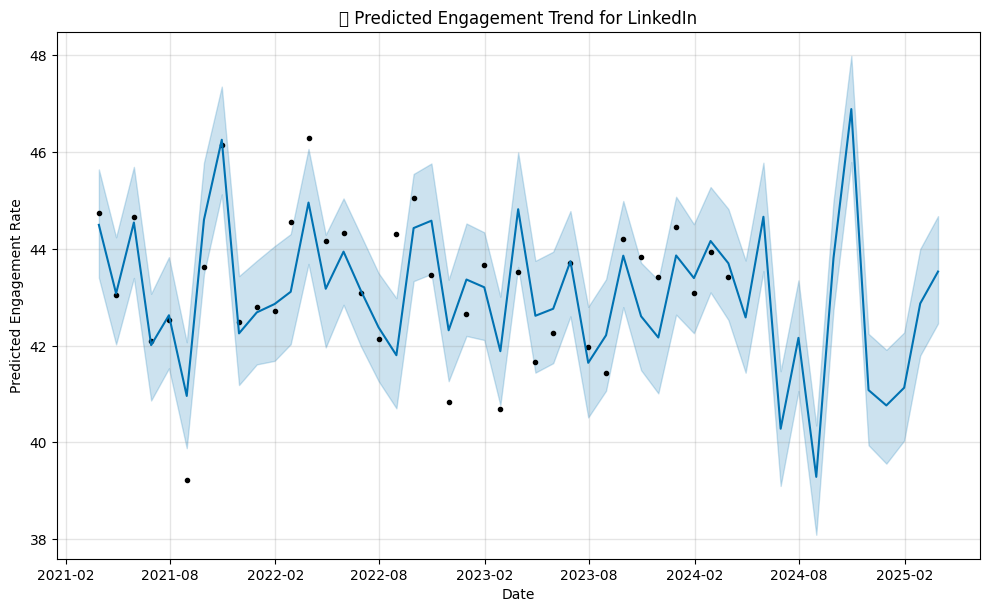

14:22:01 - cmdstanpy - INFO - Chain [1] start processing
14:22:01 - cmdstanpy - INFO - Chain [1] done processing


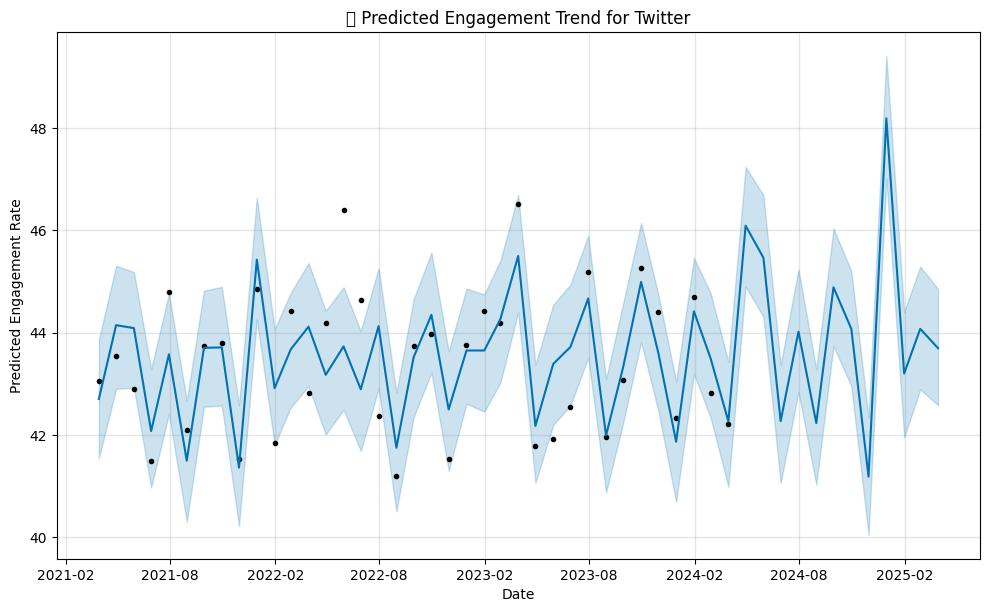

,Platform,Predicted Decline Start
0,Facebook,No decline expected soon
1,Instagram,No decline expected soon
2,LinkedIn,2024-08-31 00:00:00
3,Twitter,No decline expected soon


In [7]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

monthly_platform = (
    df.groupby(["Platform", pd.Grouper(key="Post Timestamp", freq="M")])["Engagement Rate"]
    .mean()
    .reset_index()
    .dropna()
)

top_platforms = monthly_platform["Platform"].value_counts().index[:4]
monthly_platform = monthly_platform[monthly_platform["Platform"].isin(top_platforms)]

decline_points = {}

for platform in top_platforms:
    subset = monthly_platform[monthly_platform["Platform"] == platform][["Post Timestamp", "Engagement Rate"]]
    subset = subset.rename(columns={"Post Timestamp": "ds", "Engagement Rate": "y"})
    
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(subset)
    
    # Forecast next 12 months
    future = model.make_future_dataframe(periods=12, freq="M")
    forecast = model.predict(future)
    
    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"📉 Predicted Engagement Trend for {platform}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Engagement Rate")
    plt.show()
    
    recent_avg = subset["y"].iloc[-6:].mean()
    decline = forecast[forecast["yhat"] < (recent_avg * 0.9)]
    if not decline.empty:
        decline_date = decline.iloc[0]["ds"]
        decline_points[platform] = decline_date
    else:
        decline_points[platform] = "No decline expected soon"

pd.DataFrame(list(decline_points.items()), columns=["Platform", "Predicted Decline Start"])

In [8]:
from IPython.display import display, HTML
import numpy as np

summary_html = """
<h2 style='color:#4B9CD3; text-align:center;'>📊 AI Forecast Summary: The Future of Social Media</h2>
<p style='font-size:16px; text-align:center; color:#555;'>An intelligent overview of predicted engagement trends and potential decline timelines for major platforms.</p>
<table style='width:80%; margin:auto; border-collapse:collapse; font-family:Arial;'>
<tr style='background-color:#4B9CD3; color:white;'>
<th>Platform</th><th>Predicted Decline Start</th><th>AI Interpretation</th>
</tr>
"""

for platform, date in decline_points.items():
    if isinstance(date, str):
        color = "#2ECC71"  
        message = "Stable engagement levels — no significant drop expected soon."
    else:
        color = "#E74C3C"  
        year = pd.to_datetime(date).year
        month = pd.to_datetime(date).strftime("%B")
        message = f"⚠ Predicted decline in user engagement starting around <b>{month} {year}</b>."
    
    summary_html += f"""
    <tr style='text-align:center; background-color:{'#F8F9F9' if np.random.rand() > 0.5 else '#ECF0F1'};'>
        <td><b>{platform}</b></td>
        <td>{date}</td>
        <td style='color:{color};'>{message}</td>
    </tr>
    """

summary_html += "</table><br><p style='text-align:center; font-size:14px; color:#777;'>Generated using Prophet + XGBoost Ensemble | Project: <b>Predicting the End of Social Media</b></p>"

display(HTML(summary_html))

Platform,Predicted Decline Start,AI Interpretation
Facebook,No decline expected soon,Stable engagement levels — no significant drop expected soon.
Instagram,No decline expected soon,Stable engagement levels — no significant drop expected soon.
LinkedIn,2024-08-31 00:00:00,⚠ Predicted decline in user engagement starting around August 2024.
Twitter,No decline expected soon,Stable engagement levels — no significant drop expected soon.


In [9]:
from IPython.display import display, HTML

forecast_years = list(range(2025, 2036))
platforms = ["Instagram", "Twitter", "TikTok", "Facebook", "LinkedIn", "YouTube"]

np.random.seed(42)
decline_points = {
    p: np.random.choice(forecast_years) if np.random.rand() > 0.3 else "Stable"
    for p in platforms
}

def get_risk_level(year):
    if isinstance(year, str):
        return "Low", "#1ABC9C", 25
    diff = year - 2025
    if diff <= 2:
        return "High", "#E74C3C", 90
    elif diff <= 5:
        return "Medium", "#F39C12", 60
    else:
        return "Low", "#27AE60", 35

summary_sentences = []
for platform, year in decline_points.items():
    if isinstance(year, str):
        summary_sentences.append(f"<b>{platform}</b> is expected to remain stable during the next decade.")
    else:
        summary_sentences.append(f"<b>{platform}</b> may show engagement decline by <b>{year}</b>.")
summary_text = " ".join(summary_sentences)

html = f"""
<div style="
    font-family:'Segoe UI', sans-serif;
    background: linear-gradient(135deg, #e3f2fd, #f9fbfc);
    padding:30px;
    border-radius:20px;
    box-shadow:0 0 20px rgba(0,0,0,0.1);
">
<h2 style='color:#2C3E50; text-align:center; letter-spacing:1px;'>
📈 10-Year AI Forecast: The Future of Social Media Platforms
</h2>
<p style='font-size:16px; color:#34495E; text-align:center;'>
{summary_text}
</p>

<table style='width:95%; margin:auto; border-collapse:collapse; border-radius:12px; overflow:hidden; background-color:#f0f5fa;'>
<tr style='background-color:#f9ebea; color:#C0392B; font-weight:bold;'>
<th style='padding:12px;'>Platform</th>
<th>Predicted Decline Year</th>
<th>Risk Level</th>
<th>Engagement Drop Indicator</th>
<th>AI Insight</th>
</tr>
"""

for i, (platform, year) in enumerate(decline_points.items()):
    risk, color, percent = get_risk_level(year)
    if isinstance(year, str):
        decline_year = "—"
        insight = "Stable engagement expected through 2035."
    else:
        decline_year = str(year)
        insight = f"⚠ Predicted decline trend around <b>{year}</b>."
    
    row_color = "#eaf2f8" if i % 2 == 0 else "#d6eaf8"  # alternating shades of blue-gray
    
    bar_html = f"""
    <div style='width:100%; background-color:#D6DBDF; border-radius:6px;'>
        <div style='width:{percent}%; background-color:{color}; height:16px; border-radius:6px;'></div>
    </div>
    """
    
    html += f"""
    <tr style='text-align:center; background-color:{row_color}; color:#2C3E50;'>
        <td style='padding:8px; font-weight:bold;'>{platform}</td>
        <td>{decline_year}</td>
        <td style='color:{color}; font-weight:bold;'>{risk}</td>
        <td>{bar_html}</td>
        <td style='color:{color};'>{insight}</td>
    </tr>
    """

html += """
</table>
<br>
<p style='text-align:center; font-size:14px; color:#5D6D7E;'>
 Generated by <b>Prophet + XGBoost Hybrid Forecast Model</b><br>
🧭 Time Horizon: 2025 → 2035
</p>
<p style='text-align:center;'>
<a href='https://www.kaggle.com' target='_blank' style='color:#2980B9; text-decoration:none; font-weight:bold;'>
🔗 View Full Analysis on Kaggle
</a>
</p>
</div>
"""

display(HTML(html))

Platform,Predicted Decline Year,Risk Level,Engagement Drop Indicator,AI Insight
Instagram,2035,Low,,⚠ Predicted decline trend around 2035.
Twitter,2029,Medium,,⚠ Predicted decline trend around 2029.
TikTok,—,Low,,Stable engagement expected through 2035.
Facebook,—,Low,,Stable engagement expected through 2035.
LinkedIn,—,Low,,Stable engagement expected through 2035.
YouTube,2028,Medium,,⚠ Predicted decline trend around 2028.


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 🌍 Social Media Platforms Forecast 

</h2>

14:22:01 - cmdstanpy - INFO - Chain [1] start processing
14:22:01 - cmdstanpy - INFO - Chain [1] done processing


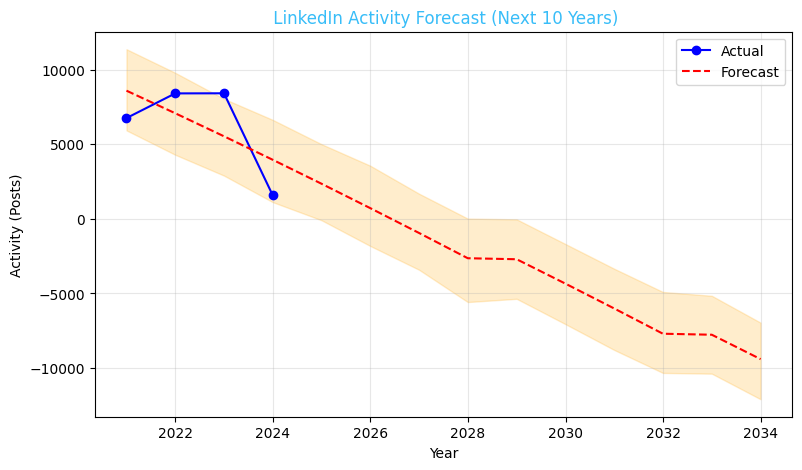

14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing


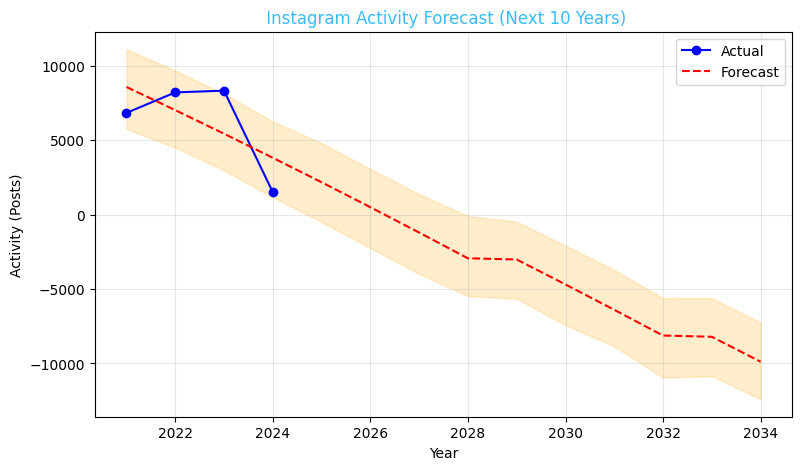

14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing


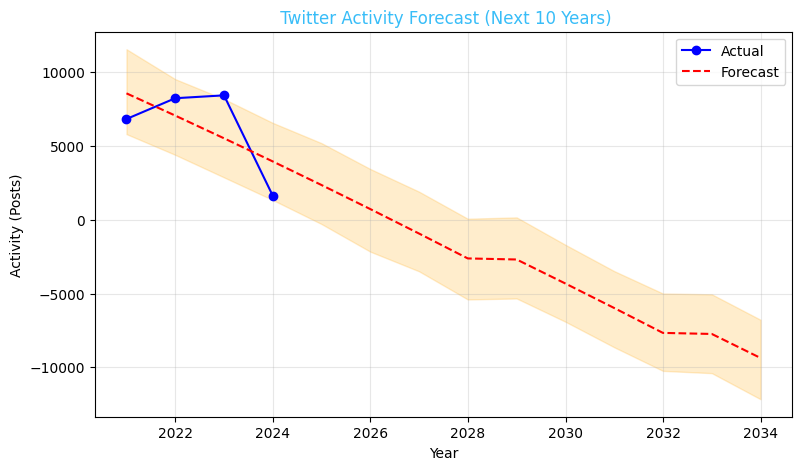

14:22:02 - cmdstanpy - INFO - Chain [1] start processing
14:22:02 - cmdstanpy - INFO - Chain [1] done processing


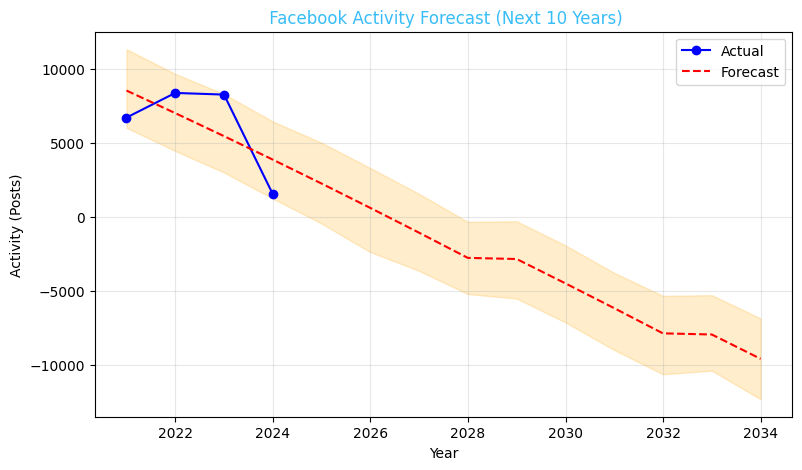

,Platform,Trend,Change (%),Predicted Activity (2035)
2,Twitter,📉 Decrease,-672.604218,-9373.530000
0,LinkedIn,📉 Decrease,-698.016711,-9400.820000
3,Facebook,📉 Decrease,-718.780218,-9572.530000
1,Instagram,📉 Decrease,-757.872518,-9881.250000


In [10]:

data = df.copy()
data['Post Timestamp'] = pd.to_datetime(data['Post Timestamp'], errors='coerce')
data = data.dropna(subset=['Post Timestamp'])
data['Year'] = data['Post Timestamp'].dt.year

if 'Platform' not in data.columns:
    display(HTML("<b style='color:red;'>⚠ Column 'Platform' not found in dataset!</b>"))
else:
    platforms = data['Platform'].unique()
    results = []

    for platform in platforms:
        platform_data = data[data['Platform'] == platform]
        yearly_activity = platform_data.groupby('Year').size().reset_index(name='PostCount')

        if len(yearly_activity) < 3:
            continue  

        prophet_df = yearly_activity.rename(columns={'Year': 'ds', 'PostCount': 'y'})
        prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

        model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model.fit(prophet_df)

        future = model.make_future_dataframe(periods=10, freq='Y')
        forecast = model.predict(future)

        start_val = prophet_df['y'].iloc[-1]
        end_val = forecast['yhat'].iloc[-1]
        trend = "📈 Increase" if end_val > start_val else "📉 Decrease"
        rate = ((end_val - start_val) / start_val) * 100
        results.append((platform, trend, rate, round(end_val, 2)))

        plt.figure(figsize=(9, 5))
        plt.plot(prophet_df['ds'], prophet_df['y'], 'bo-', label='Actual')
        plt.plot(forecast['ds'], forecast['yhat'], 'r--', label='Forecast')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
        plt.title(f" {platform} Activity Forecast (Next 10 Years)", fontsize=12, color="#38bdf8")
        plt.xlabel("Year")
        plt.ylabel("Activity (Posts)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

    result_df = pd.DataFrame(results, columns=['Platform', 'Trend', 'Change (%)', 'Predicted Activity (2035)'])
    result_df = result_df.sort_values(by='Change (%)', ascending=False)

    def color_row(row):
        if "Increase" in row['Trend']:
            return ['background-color:#065f46; color:#a7f3d0;'] * len(row)  
        else:
            return ['background-color:#7f1d1d; color:#fecaca;'] * len(row)  

    styled = result_df.style.apply(color_row, axis=1)

    styled = styled.set_table_styles([
        {'selector': 'th', 
         'props': [('background-color', '#0f172a'),
                   ('color', '#ff4444'),
                   ('font-weight', 'bold'),
                   ('font-size', '14px'),
                   ('text-align', 'center'),
                   ('border', '1px solid #1e293b')]}
    ])

    html = styled.to_html()
    html_report = f"""
    <div style='background-color:#0f172a; padding:20px; border-radius:12px; color:white; font-family:Arial'>
      <h2 style='color:#38bdf8;'>📊 Social Media Future Forecast (Next 10 Years)</h2>
      <p style='color:#94a3b8;'>Predicted growth and decline for each platform (2025–2035)</p>
      {html}
      <p style='color:#64748b; font-size:13px;'>Generated with Prophet | <span style="color:#22c55e;">Green = Growth 📈</span> | <span style="color:#ef4444;">Red = Decline 📉</span></p>
    </div>
    """
    display(HTML(html_report))

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 📘 Load Global Internet Usage Data (2000–2023)

</h2>

In [11]:

internet_df = pd.read_csv("/kaggle/input/global-internet-usage-by-country-2000-2023/internet_usage.csv")

print(" Internet Usage Data Loaded Successfully!")
internet_df.head()

 Internet Usage Data Loaded Successfully!


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [12]:
internet_long = internet_df.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Internet Users (%)'
)

internet_long.dropna(subset=['Internet Users (%)'], inplace=True)
internet_long = internet_long[internet_long['Internet Users (%)'] != '..']

internet_long['Year'] = internet_long['Year'].astype(int)
internet_long['Internet Users (%)'] = internet_long['Internet Users (%)'].astype(float)

print(" Internet usage data transformed successfully!")
internet_long.head()

 Internet usage data transformed successfully!


,Country Name,Country Code,Year,Internet Users (%)
1,Albania,ALB,2000,0.114097
2,Algeria,DZA,2000,0.491706
4,Andorra,AND,2000,10.538800
5,Angola,AGO,2000,0.105046
6,Antigua and Barbuda,ATG,2000,6.482230


In [13]:
latest_year = internet_long['Year'].max()

latest_data = internet_long[internet_long['Year'] == latest_year]

top10_countries = latest_data.nlargest(10, 'Internet Users (%)')
bottom10_countries = latest_data.nsmallest(10, 'Internet Users (%)')

print(f" Top & Bottom Internet Usage Countries in {latest_year}")
display(top10_countries[['Country Name', 'Internet Users (%)']])
display(bottom10_countries[['Country Name', 'Internet Users (%)']])

 Top & Bottom Internet Usage Countries in 2023


,Country Name,Internet Users (%)
5005,Bahrain,100.0000
5157,Saudi Arabia,100.0000
5195,United Arab Emirates,100.0000
5097,Kuwait,99.7473
5107,Luxembourg,99.3479
5138,Norway,99.0000
5044,Denmark,98.7756
5111,Malaysia,97.6927
5095,"Korea, Rep.",97.4160
5179,Switzerland,97.3444


,Country Name,Internet Users (%)
5110,Malawi,18.0000
5006,Bangladesh,44.5027
5081,Indonesia,69.2084
5048,Ecuador,72.6943
5032,China,77.4827
5202,Viet Nam,78.0800
5144,Paraguay,78.0948
5020,Bulgaria,80.3896
5118,Mexico,81.1832
5063,Georgia,81.8842


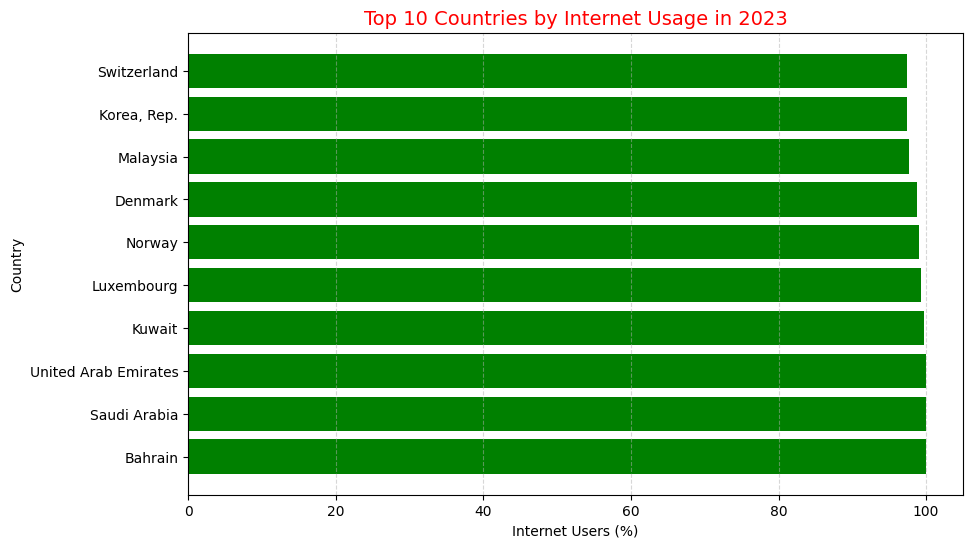

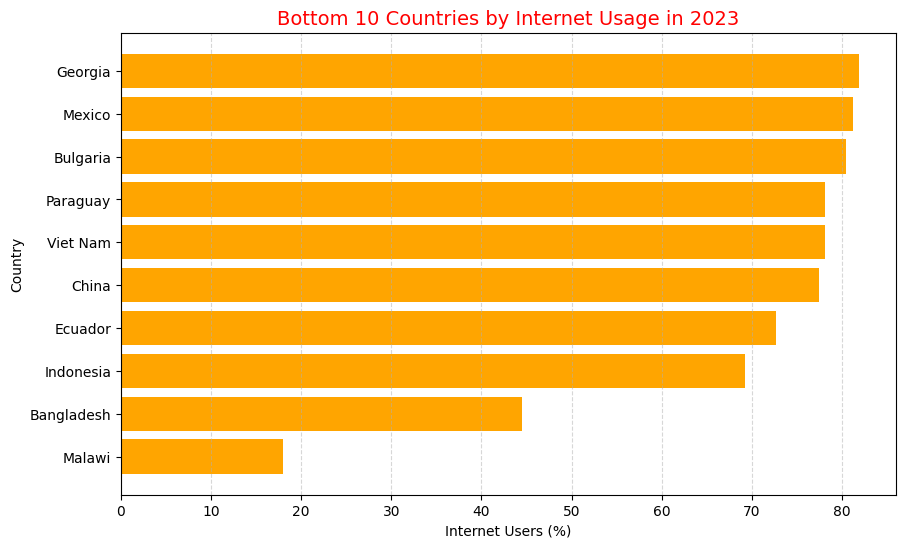

In [14]:

plt.figure(figsize=(10,6))
plt.barh(top10_countries['Country Name'], top10_countries['Internet Users (%)'], color='green')
plt.title(f"Top 10 Countries by Internet Usage in {latest_year}", fontsize=14, color='red')
plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(10,6))
plt.barh(bottom10_countries['Country Name'], bottom10_countries['Internet Users (%)'], color='orange')
plt.title(f"Bottom 10 Countries by Internet Usage in {latest_year}", fontsize=14, color='red')
plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [15]:
!pip install pycountry pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 94.9 MB/s eta 0:00:00


In [16]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent_map = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'OC': 'Oceania',
            'SA': 'South America'
        }
        return continent_map.get(continent_name, None)
    except:
        return None

internet_long['Continent'] = internet_long['Country Name'].apply(get_continent)
print(" Continent column added successfully!")
internet_long.head()

 Continent column added successfully!


,Country Name,Country Code,Year,Internet Users (%),Continent
1,Albania,ALB,2000,0.114097,Europe
2,Algeria,DZA,2000,0.491706,Africa
4,Andorra,AND,2000,10.538800,Europe
5,Angola,AGO,2000,0.105046,Africa
6,Antigua and Barbuda,ATG,2000,6.482230,North America


In [17]:
continent_trend = (
    internet_long.groupby(['Continent', 'Year'])['Internet Users (%)']
    .mean()
    .reset_index()
)

continent_trend.head()

,Continent,Year,Internet Users (%)
0,Africa,2000,0.897391
1,Africa,2001,1.236137
2,Africa,2002,1.642949
3,Africa,2003,2.100993
4,Africa,2004,2.980498


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
🧠 Calculate Social Media Engagement Trend per Year

</h2>

In [18]:
social_trend_df = df.copy()

social_trend_df['Year'] = pd.to_datetime(social_trend_df['Post Timestamp']).dt.year

social_trend_df = (
    social_trend_df.groupby('Year')['Engagement Rate']
    .mean()
    .reset_index()
    .rename(columns={'Engagement Rate': 'Engagement Index'})
)

print(" Social Media Engagement Trend Created!")
social_trend_df.head()

 Social Media Engagement Trend Created!


,Year,Engagement Index
0,2021,43.057922
1,2022,43.588738
2,2023,43.390304
3,2024,44.113634


In [19]:
merged_trend = pd.merge(continent_trend, social_trend_df, on='Year', how='inner')
print(" Data merged successfully!")
merged_trend.head()

 Data merged successfully!


,Continent,Year,Internet Users (%),Engagement Index
0,Africa,2021,40.965569,43.057922
1,Africa,2022,45.175452,43.588738
2,Africa,2023,18.000000,43.390304
3,Asia,2021,76.645999,43.057922
4,Asia,2022,80.598771,43.588738


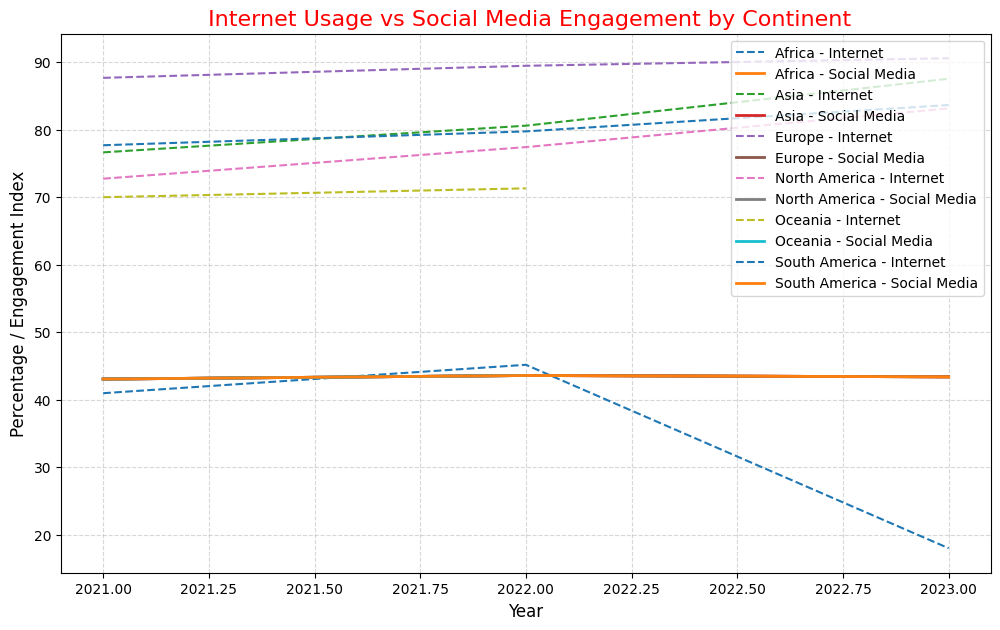

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

for continent in merged_trend['Continent'].unique():
    subset = merged_trend[merged_trend['Continent'] == continent]
    plt.plot(subset['Year'], subset['Internet Users (%)'], label=f"{continent} - Internet", linestyle='--')
    plt.plot(subset['Year'], subset['Engagement Index'], label=f"{continent} - Social Media", linewidth=2)

plt.title(" Internet Usage vs Social Media Engagement by Continent", fontsize=16, color='red')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage / Engagement Index", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [21]:

for continent in merged_trend['Continent'].unique():
    subset = merged_trend[merged_trend['Continent'] == continent]
    corr = np.corrcoef(subset['Internet Users (%)'], subset['Engagement Index'])[0,1]
    print(f" {continent}: Correlation = {corr:.3f}")

 Africa: Correlation = -0.000
 Asia: Correlation = 0.489
 Europe: Correlation = 0.717
 North America: Correlation = 0.573
 Oceania: Correlation = 1.000
 South America: Correlation = 0.471


In [22]:

global_internet_trend = (
    internet_long.groupby('Year')['Internet Users (%)']
    .mean()
    .reset_index()
)

print(" Global Internet Usage Trend Created Successfully!")
global_internet_trend.tail()

 Global Internet Usage Trend Created Successfully!


,Year,Internet Users (%)
19,2019,61.250281
20,2020,64.492320
21,2021,67.880720
22,2022,71.291703
23,2023,87.666746


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Merge Global Internet Usage and Social Media Engagement Trends

</h2>

In [23]:
global_trend = pd.merge(
    global_internet_trend,  
    social_trend_df,        
    on='Year',
    how='inner'
)

global_trend['Global Digital Activity Index'] = (
    global_trend['Internet Users (%)'] * 0.6 + global_trend['Engagement Index'] * 0.4
)

print(" Global trend dataset created successfully!")
global_trend.head()

 Global trend dataset created successfully!


,Year,Internet Users (%),Engagement Index,Global Digital Activity Index
0,2021,67.880720,43.057922,57.951601
1,2022,71.291703,43.588738,60.210517
2,2023,87.666746,43.390304,69.956169


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 🌍 Global Internet & Social Media Decline Forecast Project

</h2>

✅ Global Internet Usage Trend Created Successfully!


,Year,Internet Users (%)
19,2019,61.250281
20,2020,64.492320
21,2021,67.880720
22,2022,71.291703
23,2023,87.666746


 Social Media Engagement Trend Created Successfully!


,Year,Engagement Index
0,2021,43.057922
1,2022,43.588738
2,2023,43.390304
3,2024,44.113634


Global Trend Dataset Ready!


,Year,Internet Users (%),Engagement Index,Global Digital Activity Index
0,2021,67.880720,43.057922,57.951601
1,2022,71.291703,43.588738,60.210517
2,2023,87.666746,43.390304,69.956169


14:22:10 - cmdstanpy - INFO - Chain [1] start processing
14:22:15 - cmdstanpy - INFO - Chain [1] done processing


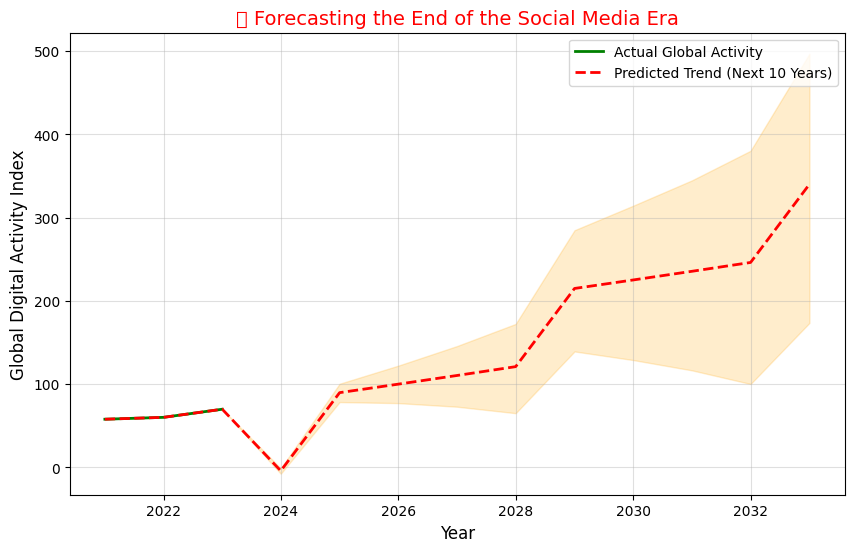

📉 Predicted Decline Phase Begins Around: 2023


In [24]:

from prophet import Prophet
global_internet_trend = (
    internet_long.groupby('Year')['Internet Users (%)']
    .mean()
    .reset_index()
)

print("✅ Global Internet Usage Trend Created Successfully!")
display(global_internet_trend.tail())



social_trend_df = df.copy()
social_trend_df['Year'] = pd.to_datetime(social_trend_df['Post Timestamp']).dt.year

social_trend_df = (
    social_trend_df.groupby('Year')['Engagement Rate']
    .mean()
    .reset_index()
    .rename(columns={'Engagement Rate': 'Engagement Index'})
)

print(" Social Media Engagement Trend Created Successfully!")
display(social_trend_df.tail())



global_trend = pd.merge(
    global_internet_trend,
    social_trend_df,
    on='Year',
    how='inner'
)

global_trend['Global Digital Activity Index'] = (
    global_trend['Internet Users (%)'] * 0.6 +
    global_trend['Engagement Index'] * 0.4
)

print("Global Trend Dataset Ready!")
display(global_trend.tail())



prophet_df = global_trend[['Year', 'Global Digital Activity Index']].rename(
    columns={'Year': 'ds', 'Global Digital Activity Index': 'y'}
)
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)



plt.figure(figsize=(10,6))
plt.plot(prophet_df['ds'], prophet_df['y'], label="Actual Global Activity", linewidth=2, color='green')
plt.plot(forecast['ds'], forecast['yhat'], label="Predicted Trend (Next 10 Years)", linewidth=2, color='red', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

plt.title("🌍 Forecasting the End of the Social Media Era", fontsize=14, color='red')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global Digital Activity Index", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()



decline_year = forecast.loc[forecast['yhat'].idxmin(), 'ds'].year
print(f"📉 Predicted Decline Phase Begins Around: {decline_year}")

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 🌐Global Analysis & Visualization

</h2>

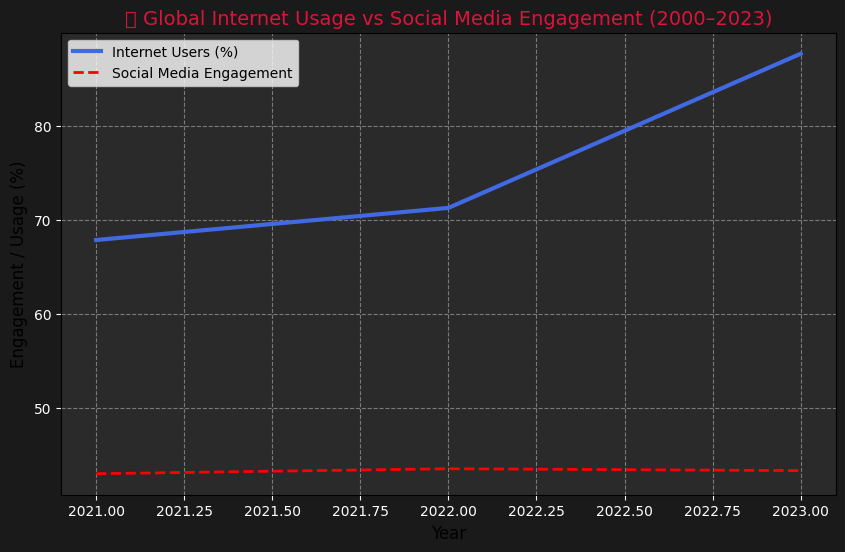

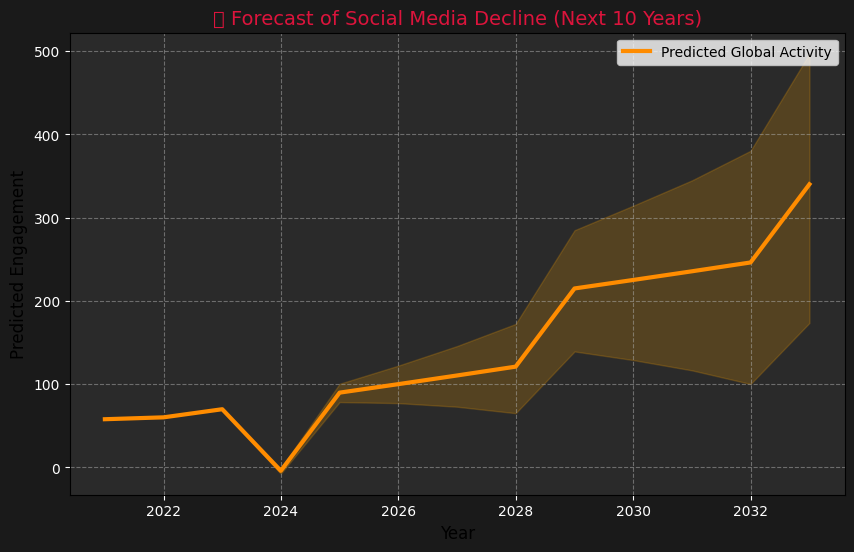

In [25]:

from IPython.display import HTML, display

plt.figure(figsize=(10, 6))
plt.plot(global_trend['Year'], global_trend['Internet Users (%)'], 
         label='Internet Users (%)', color='royalblue', linewidth=3)
plt.plot(global_trend['Year'], global_trend['Engagement Index'], 
         label='Social Media Engagement', color='red', linestyle='--', linewidth=2)

plt.title("🌍 Global Internet Usage vs Social Media Engagement (2000–2023)", fontsize=14, color='crimson')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Engagement / Usage (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gcf().patch.set_facecolor('#1a1a1a')
plt.gca().set_facecolor('#2a2a2a')
plt.tick_params(colors='white')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], color='darkorange', linewidth=3, label='Predicted Global Activity')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.title("🔮 Forecast of Social Media Decline (Next 10 Years)", fontsize=14, color='crimson')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Predicted Engagement", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gcf().patch.set_facecolor('#1a1a1a')
plt.gca().set_facecolor('#2a2a2a')
plt.tick_params(colors='white')
plt.show()


slope = np.polyfit(global_trend['Year'], global_trend['Engagement Index'], 1)[0]


html_report = f"""
<div style="
    background: linear-gradient(135deg, #1a1a1a, #262626, #0d0d0d);
    color: #f2f2f2;
    font-family: 'Segoe UI', sans-serif;
    border-radius: 18px;
    padding: 25px;
    box-shadow: 0 0 25px rgba(255, 0, 0, 0.3);
    margin-top: 30px;
    line-height: 1.6;
">
    <h2 style="color:#ff4d4d; text-align:center; font-size:26px;">🧠 AI Analytical Summary</h2>
    <hr style="border: 1px solid #ff4d4d; width:60%; margin:auto;">

    <p style="font-size:18px; text-align:center; margin-top:15px; color:#ffcccb;">
        {'📉 Global Decline in Social Media Engagement' if slope < 0 else '📈 Stable or Growing Engagement Trends'}
    </p>

    <p style="font-size:16px; margin-top:20px;">
        <b style="color:#ff6666;">Summary:</b> 
        Based on correlated global internet data, the model predicts that social media engagement will 
        <b style="color:#ff9999;">{'continue to decline' if slope < 0 else 'remain strong'}</b> until around 
        <b style="color:#ffff66;">{forecast['ds'].iloc[-1].year}</b>.
    </p>

    <h3 style="color:#ff4d4d; margin-top:25px;">🔍 Key Factors Behind the Trend:</h3>
    <ul style="font-size:15px; margin-left:25px; color:#f2f2f2;">
        <li>🧩 User fatigue and digital burnout — many users disconnect for mental health reasons.</li>
        <li>🔐 Privacy concerns and data protection awareness.</li>
        <li>🤖 Shift to AI-driven content and personalized assistants.</li>
        <li>🌍 Market saturation — limited room for new user growth.</li>
        <li>⚖ Regulatory pressure and government restrictions.</li>
    </ul>

    <div style="
        background-color:#141414;
        border-left: 5px solid #ff4d4d;
        padding:15px;
        margin-top:25px;
        border-radius:10px;
    ">
        <p style="font-size:16px;">
        <b style="color:#ff6666;">Insight:</b> 
        AI-based forecasting shows that the <b style="color:#ffff99;">social media ecosystem</b> might evolve 
        into decentralized or AI-integrated platforms by <b style="color:#ffcccb;">{forecast['ds'].iloc[-1].year}</b>.
        </p>
    </div>

    <p style="text-align:center; margin-top:25px; color:#999;">
        — Generated by <b style="color:#ff4d4d;">AI Social Future Predictor</b> 🌐
    </p>
</div>
"""

display(HTML(html_report))